In [1]:
%pip install tulipy
%pip install pynance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tulipy: filename=tulipy-0.4.0-cp313-cp313-win_amd64.whl size=103895 sha256=bcccc01e9bbc64b45af4acb46e63bcc6e2bf90920d08c7f81740db5eb5ae787e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\66\bd\c3\8c074cf2a0f1505f706f3631fa579edcb8fd68e8cbc87231a9
Successfully built tulipy
Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0/3 [pandas-datareader]
   ---------------------------------------- 0/3 [pandas-datareader]
   ---------------------------------------- 0/3 [pandas-datareader]
   ---------------------------------------- 0/3 [pandas-datareader]
   ----------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import tulipy as ti
import pynance as pn

In [6]:
# Directory containing your CSV files
data_dir = '../../data/yfinancedata'
file_list = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
# Initialize an empty list to store DataFrames
all_data = []

# Process Each File
for file_name in file_list:
    file_path = os.path.join(data_dir, file_name)
    stock_data = pd.read_csv(file_path)

    # Ensure Date is a Datetime Object
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    # Add a column for the stock name (derived from file name)
    stock_name = os.path.splitext(file_name)[0]
    stock_data['Stock'] = stock_name

    # Append to the list
    all_data.append(stock_data)

# Concatenate all DataFrames into one
combined_data = pd.concat(all_data, ignore_index=True)

# Save Combined Data to CSV
output_file = '../../data/combined_stock_data.csv'
combined_data.to_csv(output_file, index=False)
print(f"Combined data saved to {output_file}")

# Optional: Preview the combined data
print("Preview of Combined Data:")
print(combined_data.head())

Combined data saved to ../../data/combined_stock_data.csv
Preview of Combined Data:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits                 Stock  
0        0.0           0.0  AAPL_historical_data  
1        0.0           0.0  AAPL_historical_data  
2        0.0           0.0  AAPL_historical_data  
3        0.0           0.0  AAPL_historical_data  
4        0.0           0.0  AAPL_historical_data  


In [7]:
def visualize_indicators_in_grid(stock_data, stock_name):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{stock_name}: Technical Indicators', fontsize=16)

    # Close Price with SMA
    axes[0, 0].plot(stock_data['Close'], label='Close Price', alpha=0.75)
    axes[0, 0].plot(stock_data['SMA_20'], label='SMA 20', linestyle='--')
    axes[0, 0].set_title('Close Price with SMA')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].legend()

    # RSI
    axes[0, 1].plot(stock_data['RSI'], label='RSI', color='orange')
    axes[0, 1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axes[0, 1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    axes[0, 1].set_title('RSI Indicator')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('RSI Value')
    axes[0, 1].legend()

    # MACD
    axes[1, 0].plot(stock_data['MACD'], label='MACD', color='blue')
    axes[1, 0].plot(stock_data['MACD_signal'], label='Signal Line', color='red')
    axes[1, 0].set_title('MACD Indicator')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].legend()

    # Bollinger Bands
    axes[1, 1].plot(stock_data['Close'], label='Close Price', alpha=0.75)
    axes[1, 1].plot(stock_data['upper_band'], label='Upper Band', linestyle='--', color='red')
    axes[1, 1].plot(stock_data['middle_band'], label='Middle Band', linestyle='--', color='blue')
    axes[1, 1].plot(stock_data['lower_band'], label='Lower Band', linestyle='--', color='green')
    axes[1, 1].set_title('Bollinger Bands')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Price')
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [18]:
def calculate_financial_metrics_with_pynance(stock_data, stock_name):
    print(f"Financial metrics for {stock_name}:")
    print(stock_data.describe())  # Summary statistics

    # Calculate Daily Returns
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

    # Calculate Annualized Volatility (252 trading days assumed)
    annualized_volatility = stock_data['Daily_Returns'].std() * (252 ** 0.5)
    print(f"Annualized Volatility: {annualized_volatility:.2f}")

    # Visualize Daily Returns
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Daily_Returns'], label='Daily Returns', alpha=0.75)
    plt.title(f'{stock_name}: Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.show()

In [11]:
print(combined_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'Stock'],
      dtype='object')


In [12]:
combined_data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL_historical_data
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL_historical_data
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL_historical_data
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL_historical_data
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL_historical_data


In [16]:
combined_data = pd.read_csv('../../data/combined_stock_data.csv')  # Use the correct path
print(combined_data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits                 Stock  
0        0.0           0.0  AAPL_historical_data  
1        0.0           0.0  AAPL_historical_data  
2        0.0           0.0  AAPL_historical_data  
3        0.0           0.0  AAPL_historical_data  
4        0.0           0.0  AAPL_historical_data  


Processing stock: AAPL_historical_data


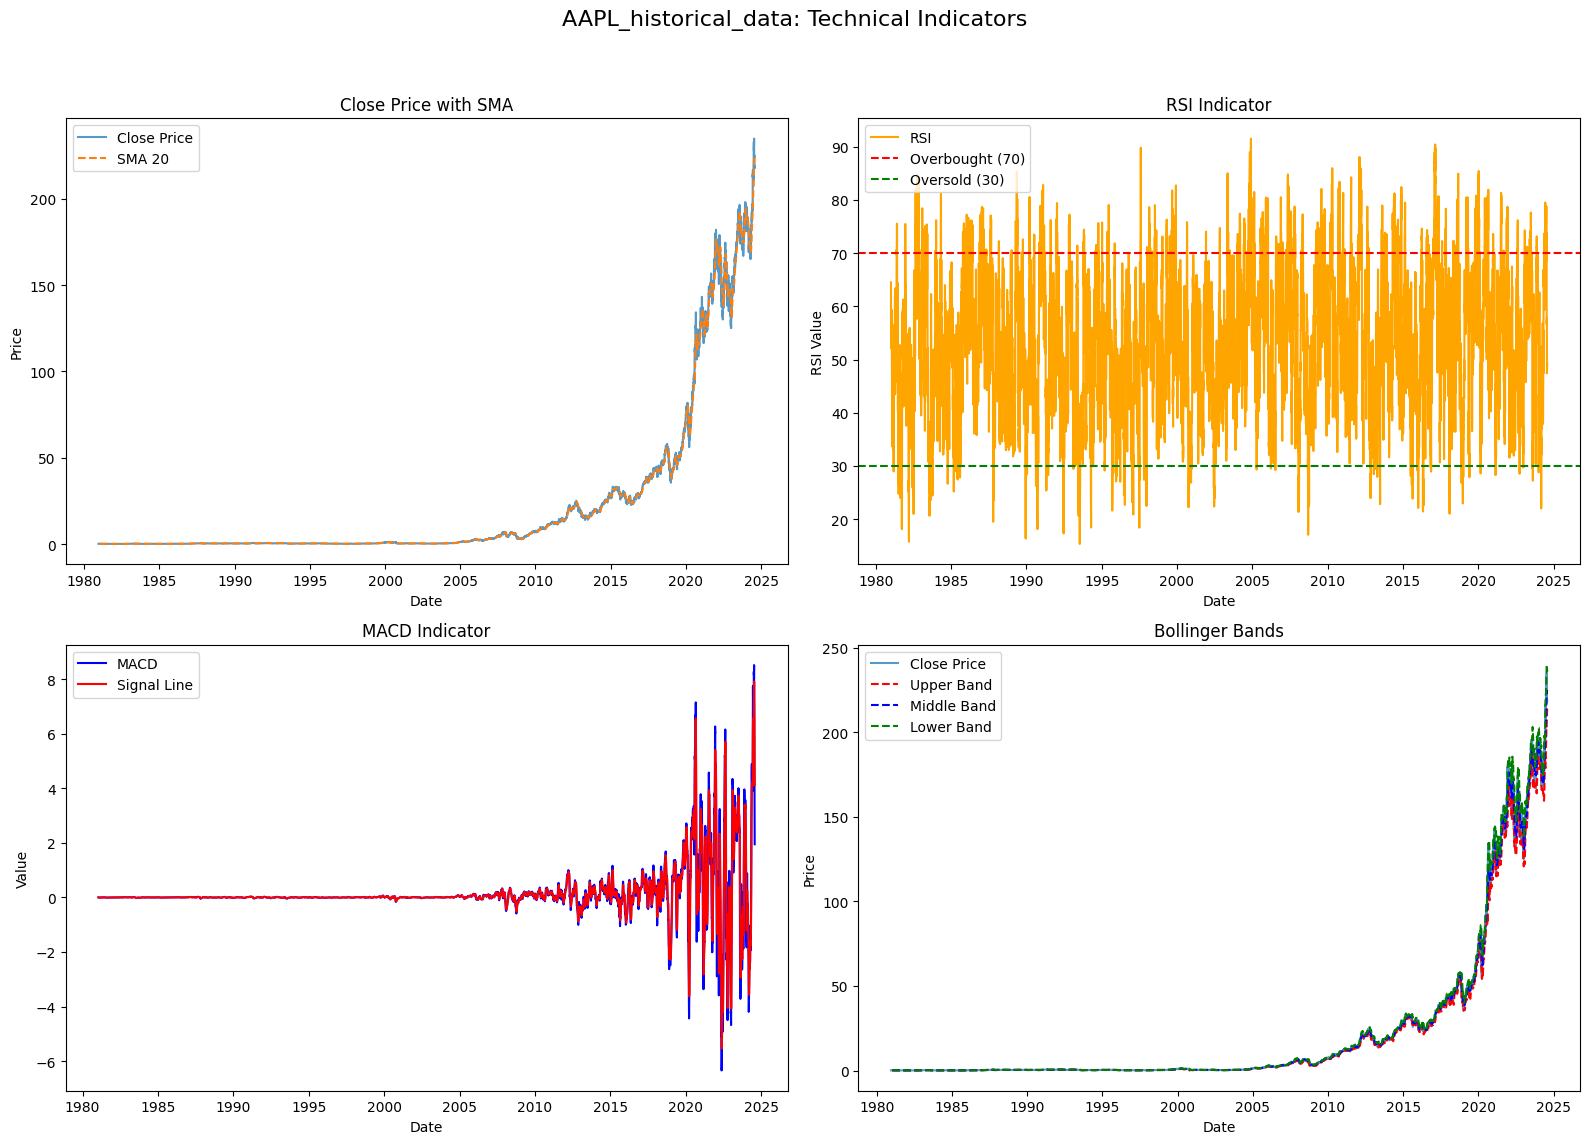

Financial metrics for AAPL_historical_data:
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits        SMA_20           RSI  \
count  1.099800e+04  10998.000000  10998.000000  10979.000000  10984.000000   
mean   3.180806e+08      0.000752      0.001546     22.157875     53.119636   
std    

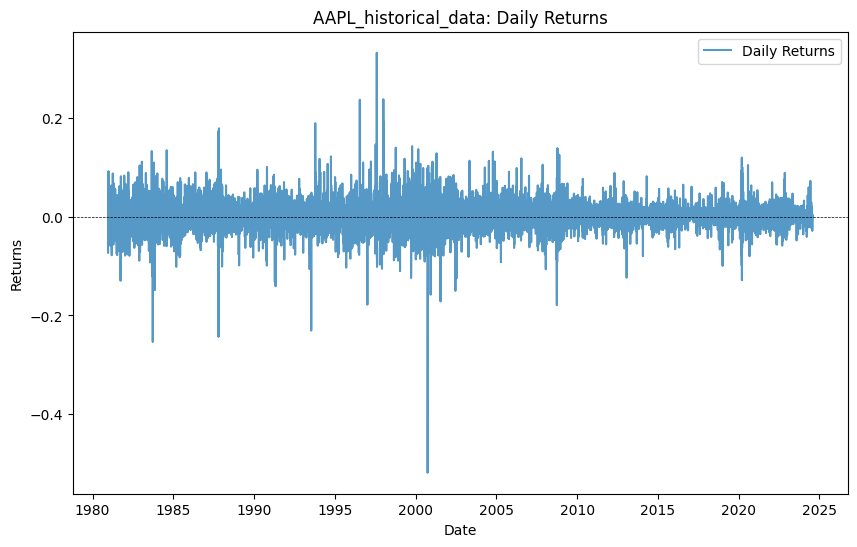

Processed data saved for AAPL_historical_data to ../../data/processed_AAPL_historical_data.csv
Processing stock: AMZN_historical_data


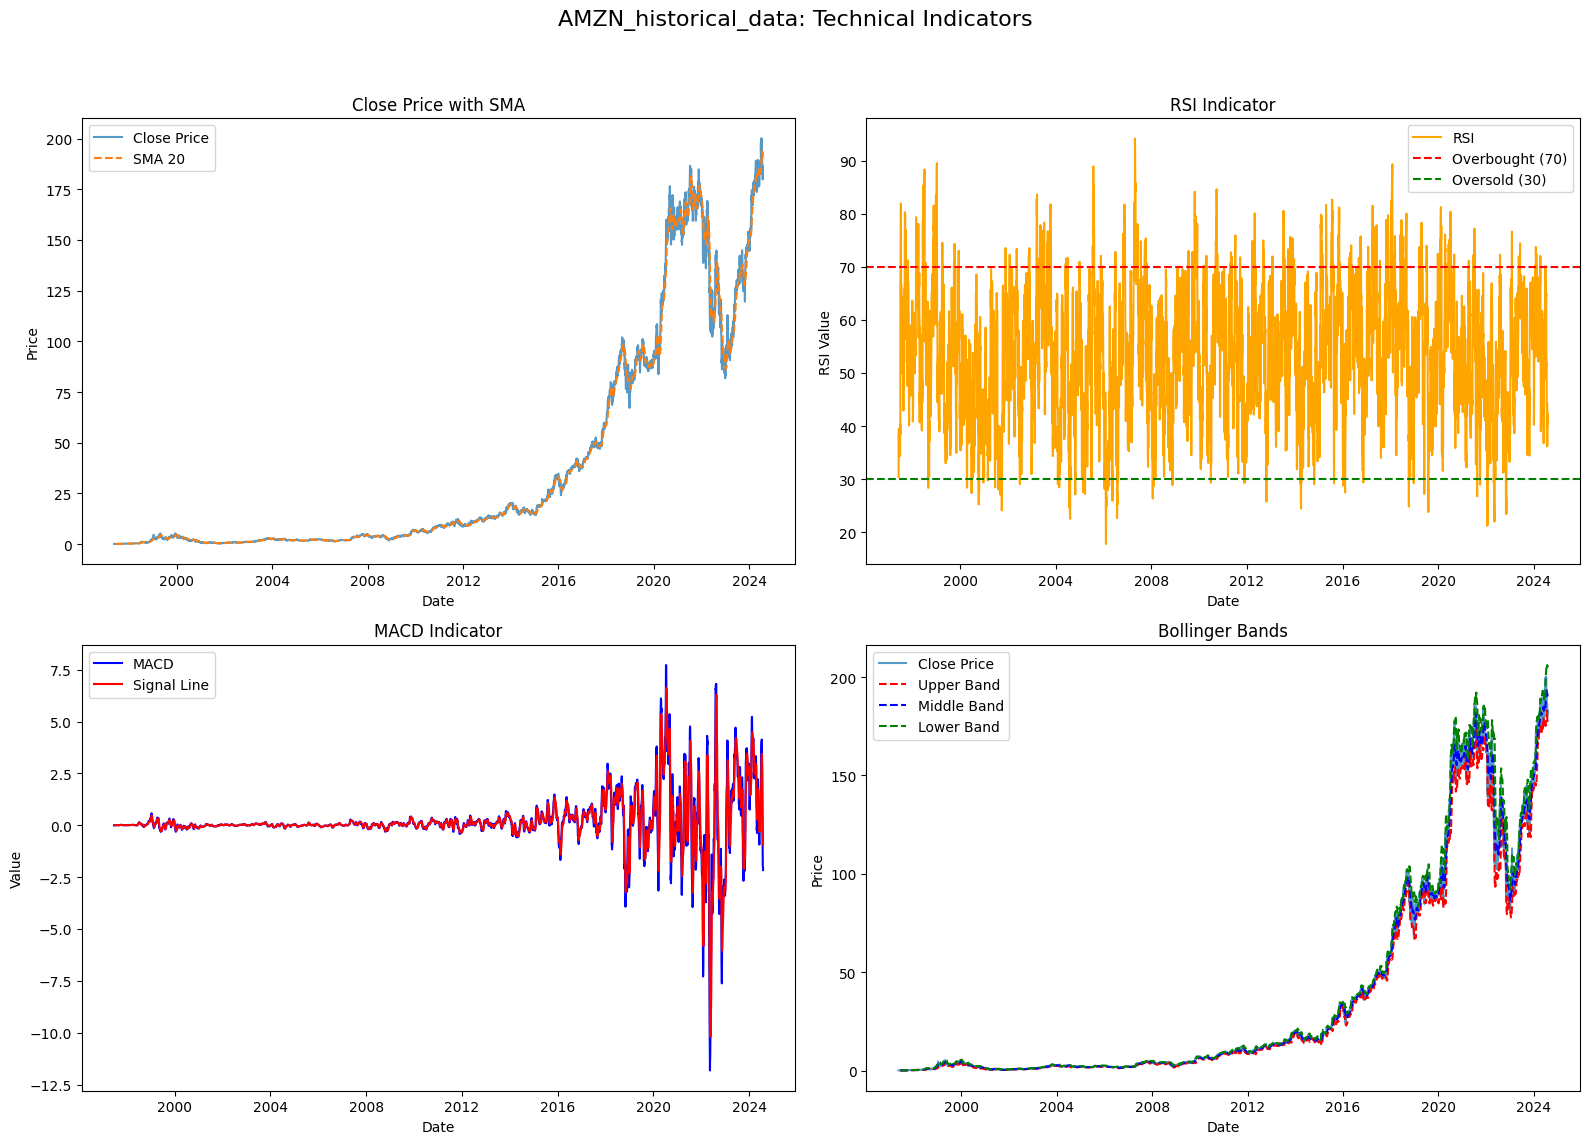

Financial metrics for AMZN_historical_data:
              Open         High          Low        Close    Adj Close  \
count  6846.000000  6846.000000  6846.000000  6846.000000  6846.000000   
mean     37.360464    37.801009    36.882561    37.351096    37.351096   
std      53.756955    54.366449    53.087051    53.729913    53.729913   
min       0.070313     0.072396     0.065625     0.069792     0.069792   
25%       2.070125     2.120625     2.040156     2.076750     2.076750   
50%       8.574500     8.666750     8.466500     8.591500     8.591500   
75%      50.453876    50.723249    50.059875    50.426500    50.426500   
max     200.089996   201.199997   199.050003   200.000000   200.000000   

             Volume  Dividends  Stock Splits       SMA_20          RSI  \
count  6.846000e+03     6846.0   6846.000000  6827.000000  6832.000000   
mean   1.380713e+08        0.0      0.003944    37.196212    53.522118   
std    1.382346e+08        0.0      0.246789    53.448083    12.083

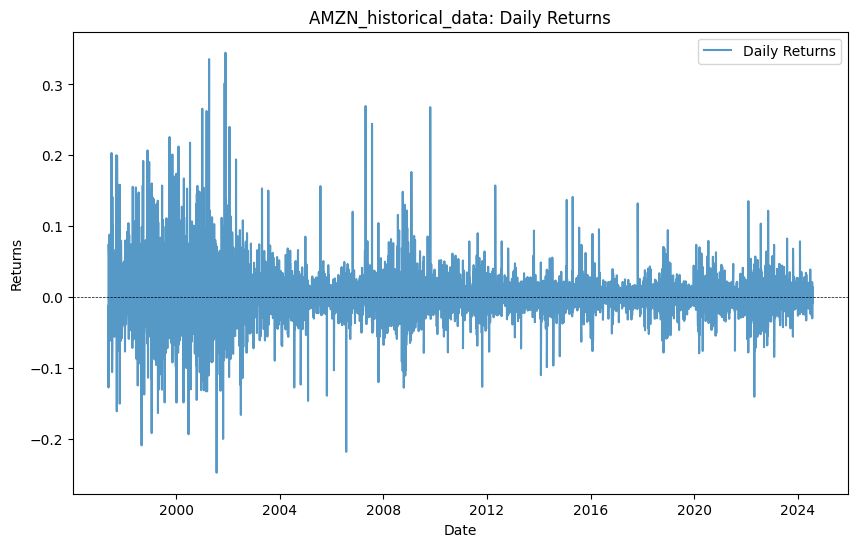

Processed data saved for AMZN_historical_data to ../../data/processed_AMZN_historical_data.csv
Processing stock: GOOG_historical_data


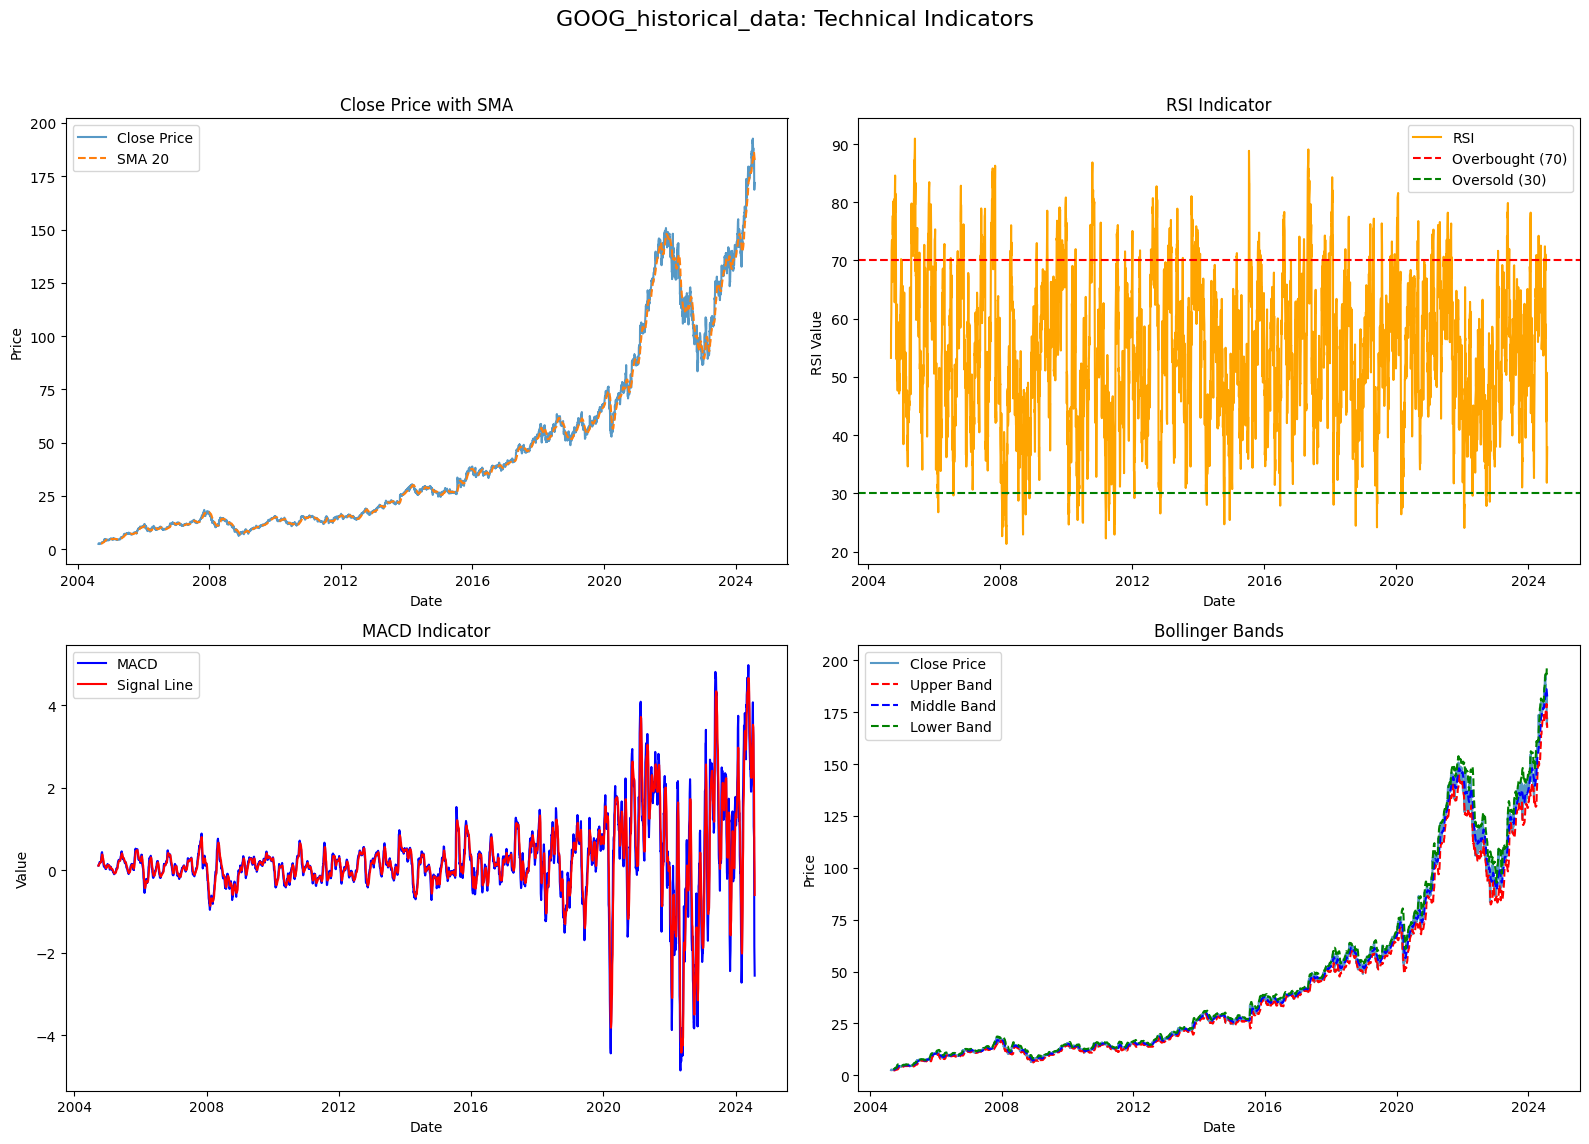

Financial metrics for GOOG_historical_data:
              Open         High          Low        Close    Adj Close  \
count  5020.000000  5020.000000  5020.000000  5020.000000  5020.000000   
mean     45.251315    45.728793    44.800587    45.274515    45.224493   
std      43.338635    43.818298    42.918167    43.377299    43.332534   
min       2.470490     2.534002     2.390042     2.490913     2.488082   
25%      13.034705    13.145415    12.881592    13.032090    13.017277   
50%      26.982210    27.194902    26.791387    27.005927    26.975230   
75%      60.215126    60.758375    59.811811    60.280252    60.211734   
max     191.750000   193.309998   190.619995   192.660004   192.660004   

             Volume    Dividends  Stock Splits       SMA_20          RSI  \
count  5.020000e+03  5020.000000   5020.000000  5001.000000  5006.000000   
mean   1.157539e+08     0.000040      0.004583    45.102510    54.428017   
std    1.497936e+08     0.002823      0.284034    42.986537  

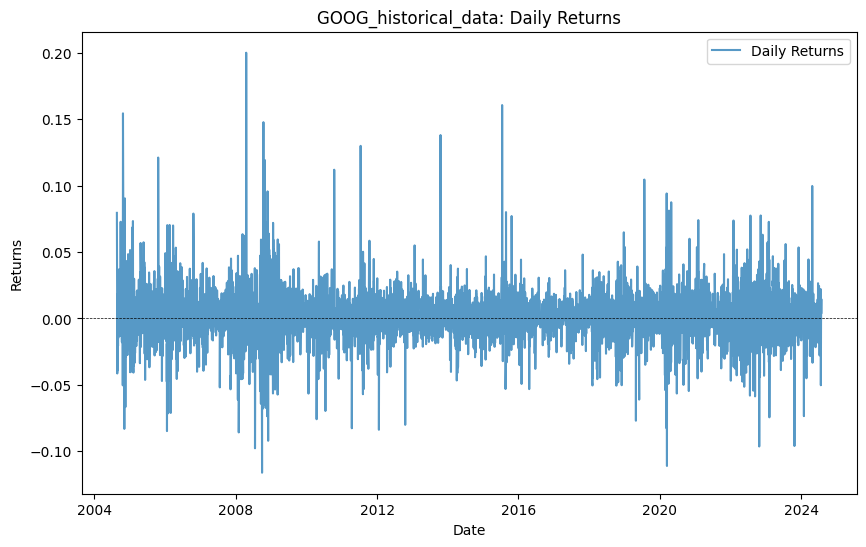

Processed data saved for GOOG_historical_data to ../../data/processed_GOOG_historical_data.csv
Processing stock: META_historical_data


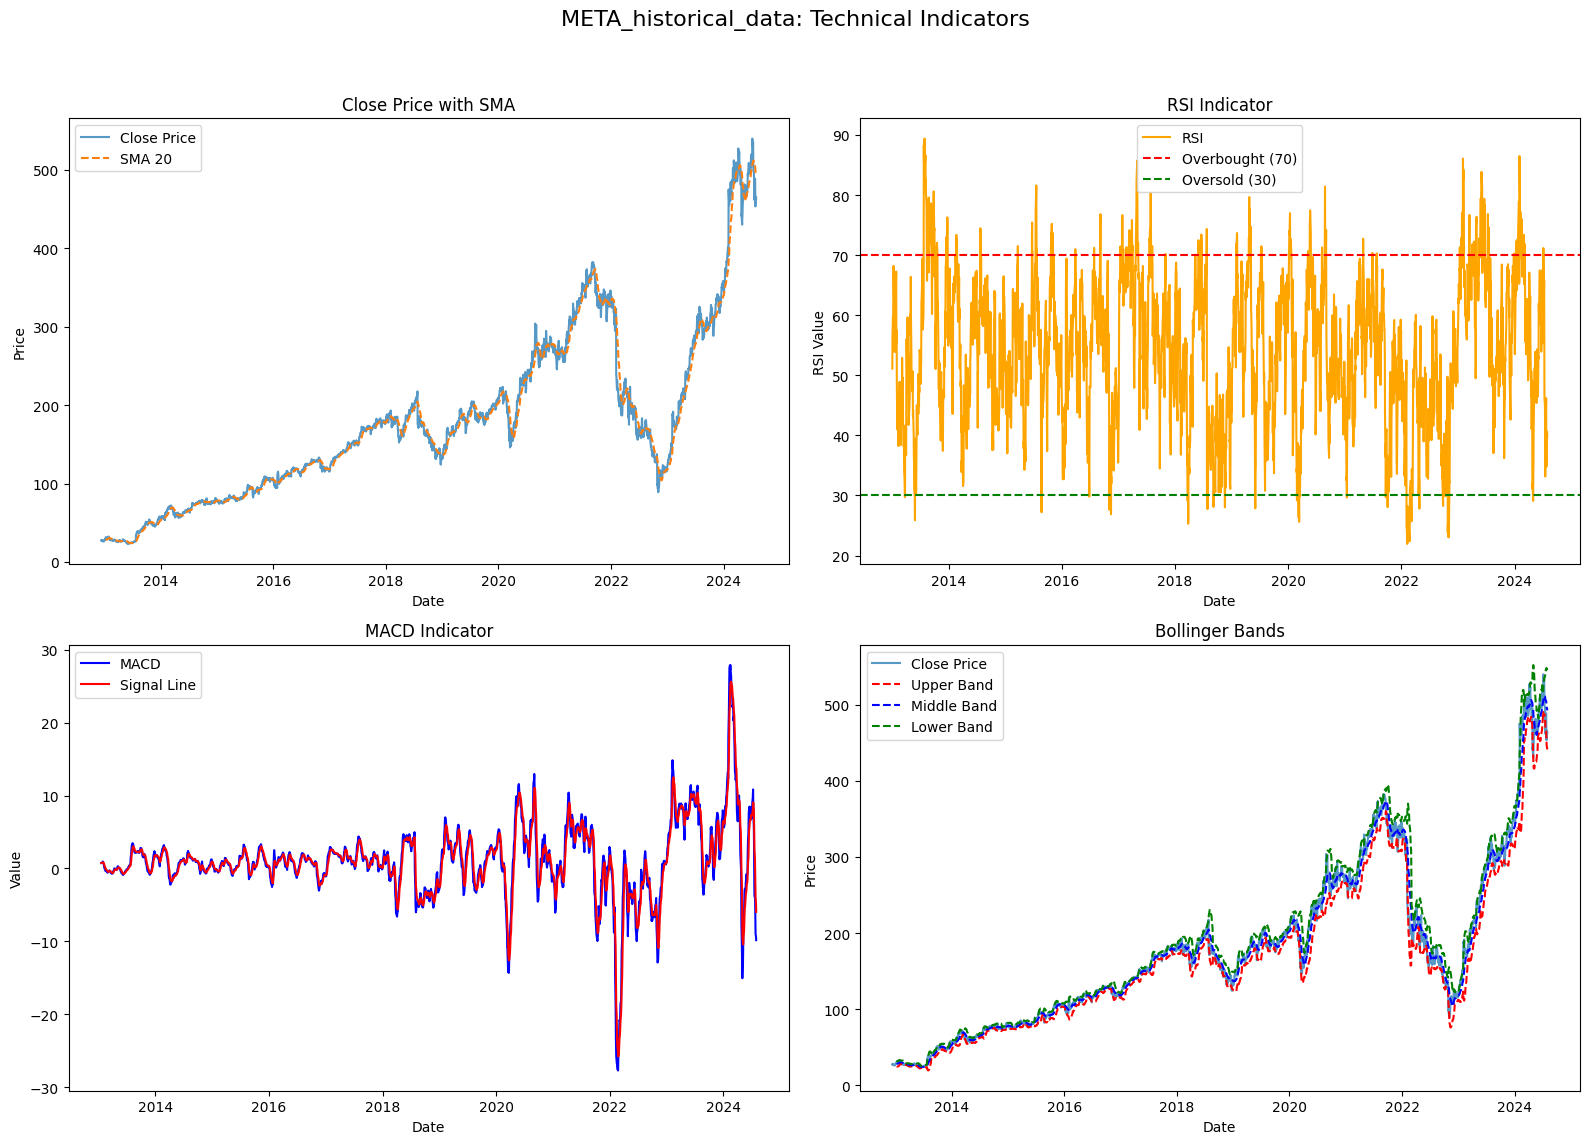

Financial metrics for META_historical_data:
              Open         High          Low        Close    Adj Close  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    179.557215   181.875331   177.317761   179.649453   179.305921   
std     108.864895   110.256219   107.511134   108.906971   108.755055   
min      22.990000    23.090000    22.670000    22.900000    22.853037   
25%      97.767502    98.772499    95.889997    97.382498    97.182795   
50%     166.870003   168.850006   164.210007   166.855003   166.512825   
75%     231.450005   234.934998   228.687504   232.424999   231.948360   
max     542.349976   542.809998   528.359985   539.909973   539.909973   

             Volume    Dividends  Stock Splits       SMA_20          RSI  \
count  2.926000e+03  2926.000000        2926.0  2907.000000  2912.000000   
mean   2.872083e+07     0.000342           0.0   179.170400    54.377650   
std    2.269811e+07     0.013070           0.0   107.231069  

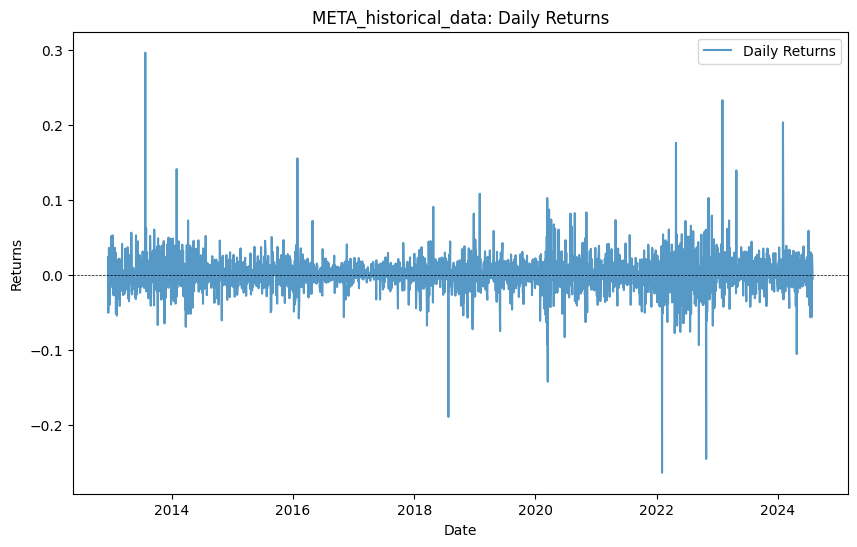

Processed data saved for META_historical_data to ../../data/processed_META_historical_data.csv
Processing stock: MSFT_historical_data


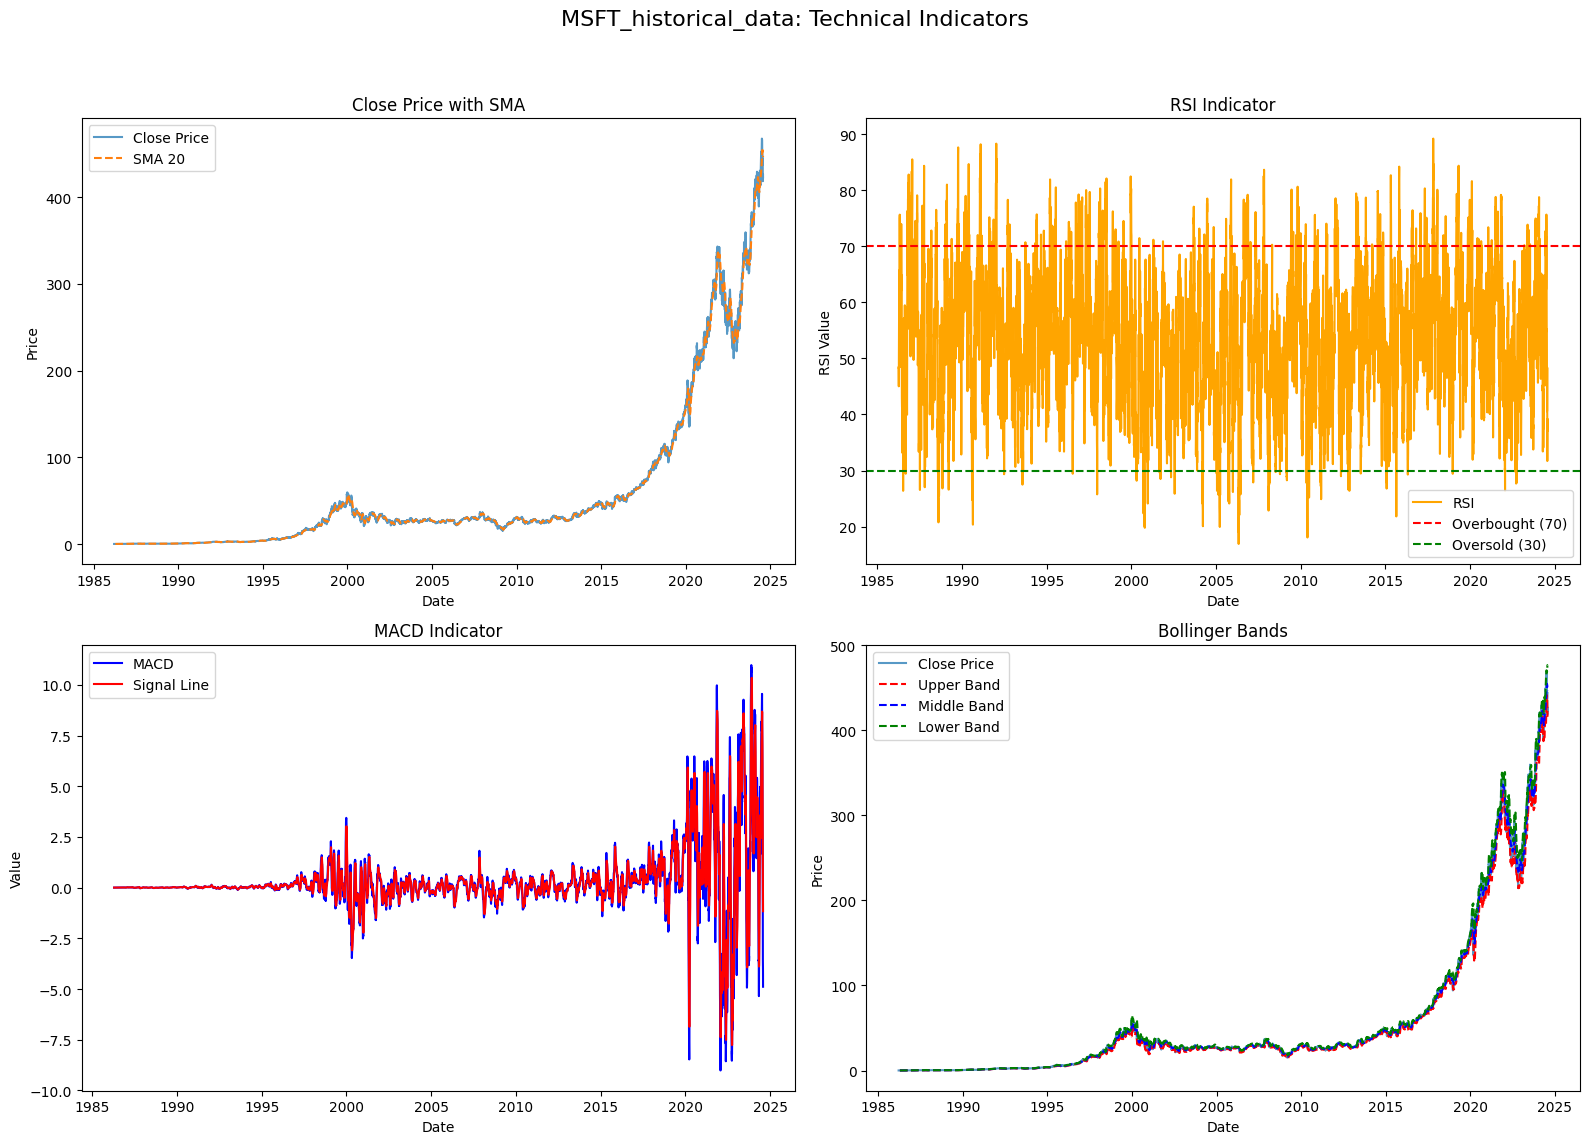

Financial metrics for MSFT_historical_data:
              Open         High          Low        Close    Adj Close  \
count  9672.000000  9672.000000  9672.000000  9672.000000  9672.000000   
mean     58.402199    59.003071    57.784759    58.417683    52.719365   
std      90.122302    90.958645    89.232546    90.146786    90.066461   
min       0.088542     0.092014     0.088542     0.090278     0.055665   
25%       5.695313     5.770508     5.617188     5.695313     3.511695   
50%      27.304999    27.600000    27.085000    27.341875    19.145540   
75%      46.687500    47.099998    46.138672    46.657187    38.339042   
max     467.000000   468.350006   464.459991   467.559998   466.718781   

             Volume    Dividends  Stock Splits       SMA_20          RSI  \
count  9.672000e+03  9672.000000   9672.000000  9653.000000  9658.000000   
mean   5.677678e+07     0.002982      0.001758    58.101983    53.759398   
std    3.814123e+07     0.046524      0.057944    89.380494  

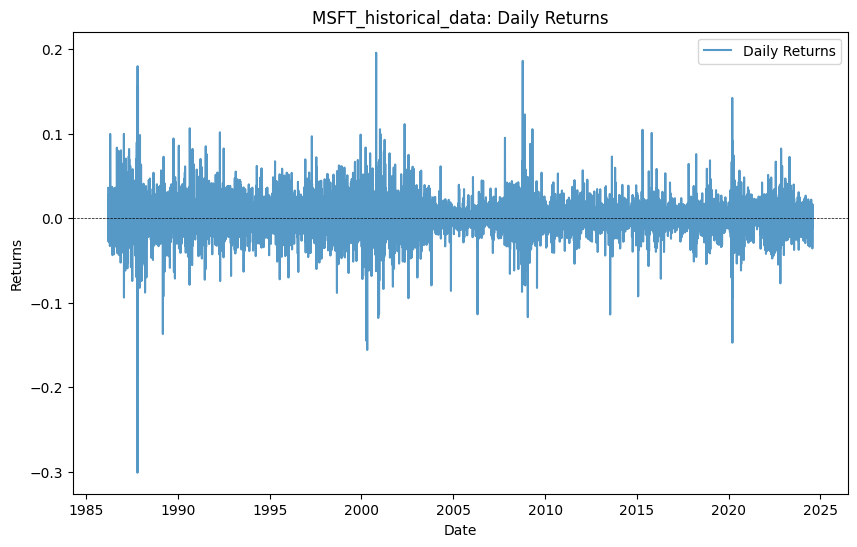

Processed data saved for MSFT_historical_data to ../../data/processed_MSFT_historical_data.csv
Processing stock: NVDA_historical_data


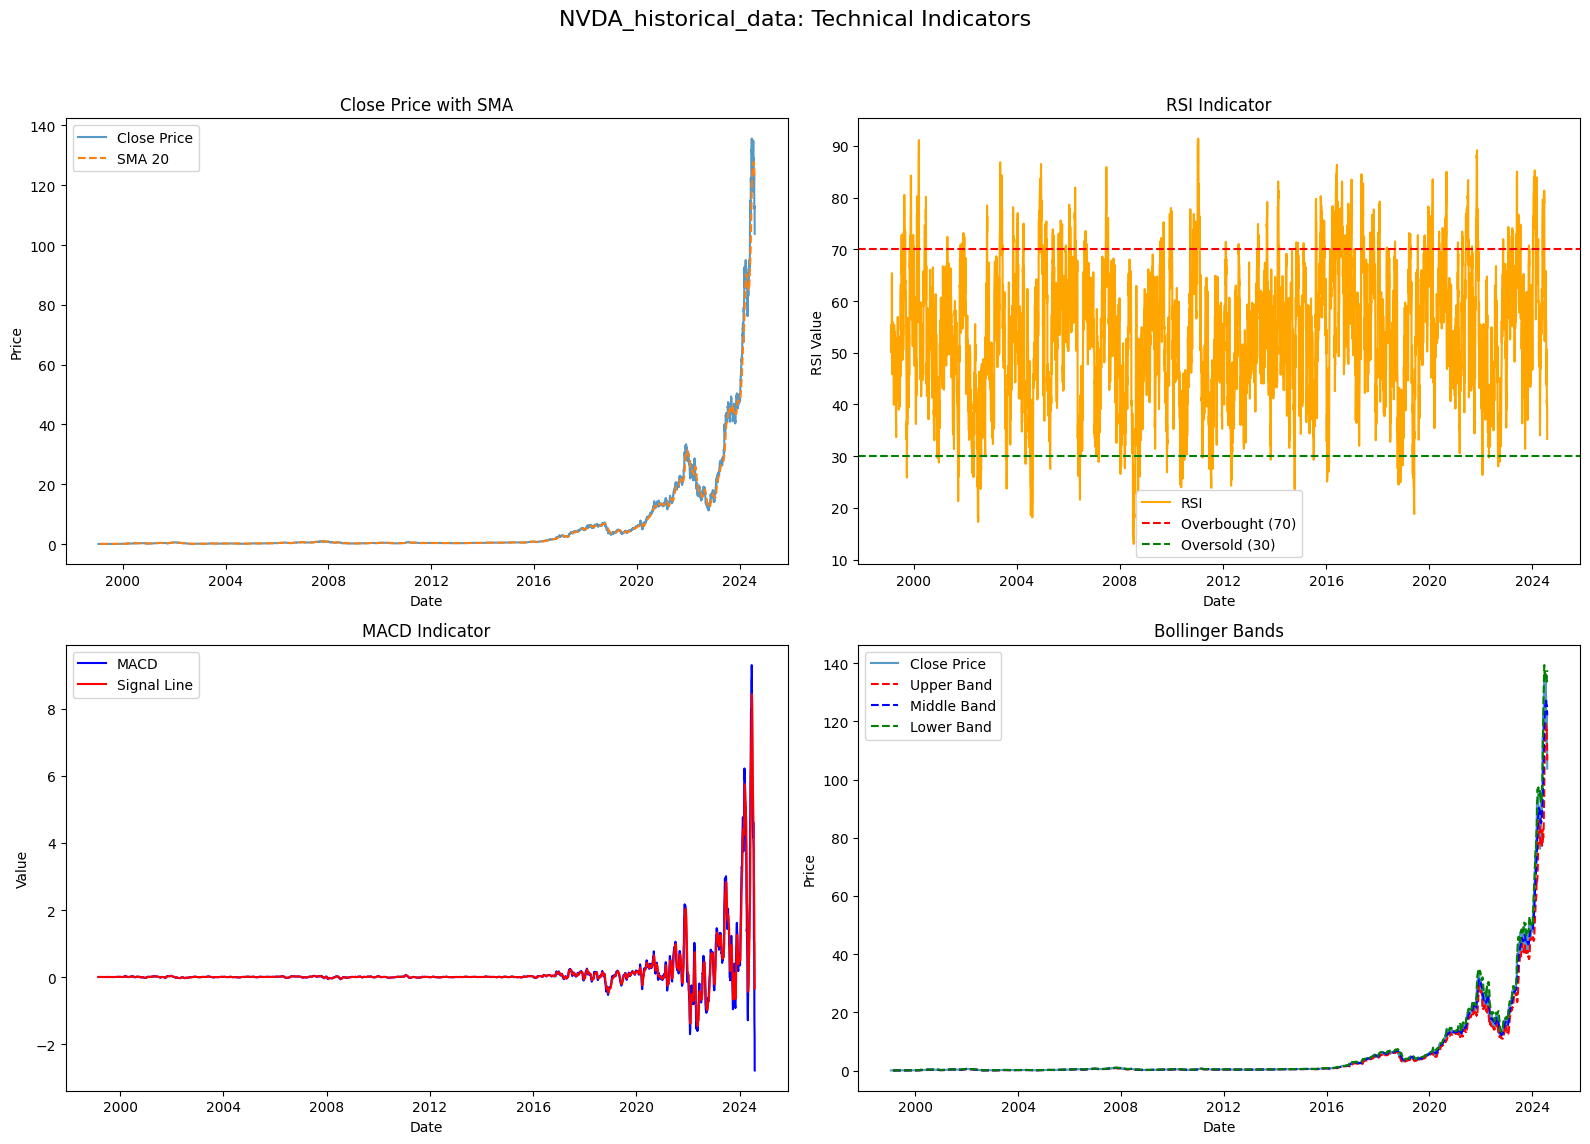

Financial metrics for NVDA_historical_data:
              Open         High          Low        Close    Adj Close  \
count  6421.000000  6421.000000  6421.000000  6421.000000  6421.000000   
mean      6.207884     6.320466     6.085095     6.207702     6.181334   
std      16.138328    16.424862    15.794914    16.118517    16.121352   
min       0.034896     0.035547     0.033333     0.034115     0.031291   
25%       0.277500     0.286250     0.269500     0.276750     0.253843   
50%       0.457250     0.464750     0.450750     0.457000     0.427637   
75%       4.182500     4.235750     4.116500     4.175000     4.130434   
max     139.800003   140.759995   132.419998   135.580002   135.580002   

             Volume    Dividends  Stock Splits       SMA_20          RSI  \
count  6.421000e+03  6421.000000   6421.000000  6402.000000  6407.000000   
mean   6.060791e+08     0.000025      0.003348     6.050654    53.598449   
std    4.323482e+08     0.000316      0.142397    15.517411  

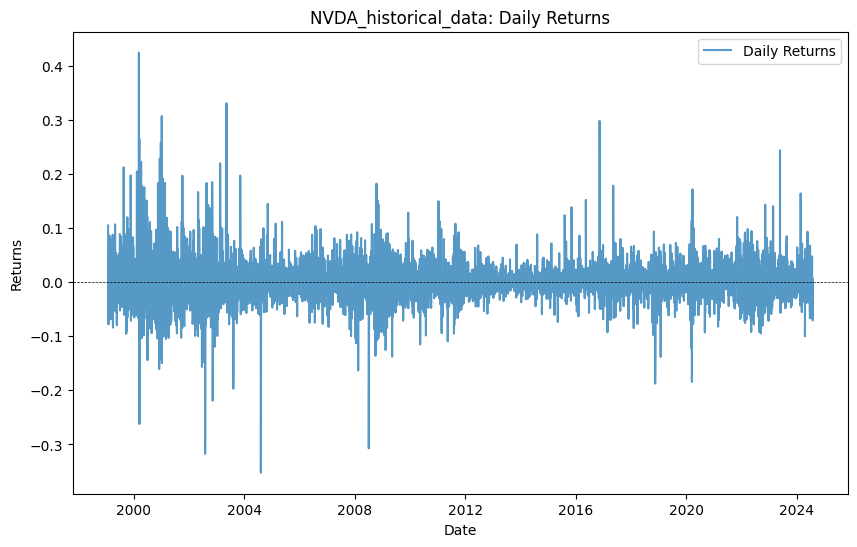

Processed data saved for NVDA_historical_data to ../../data/processed_NVDA_historical_data.csv
Processing stock: TSLA_historical_data


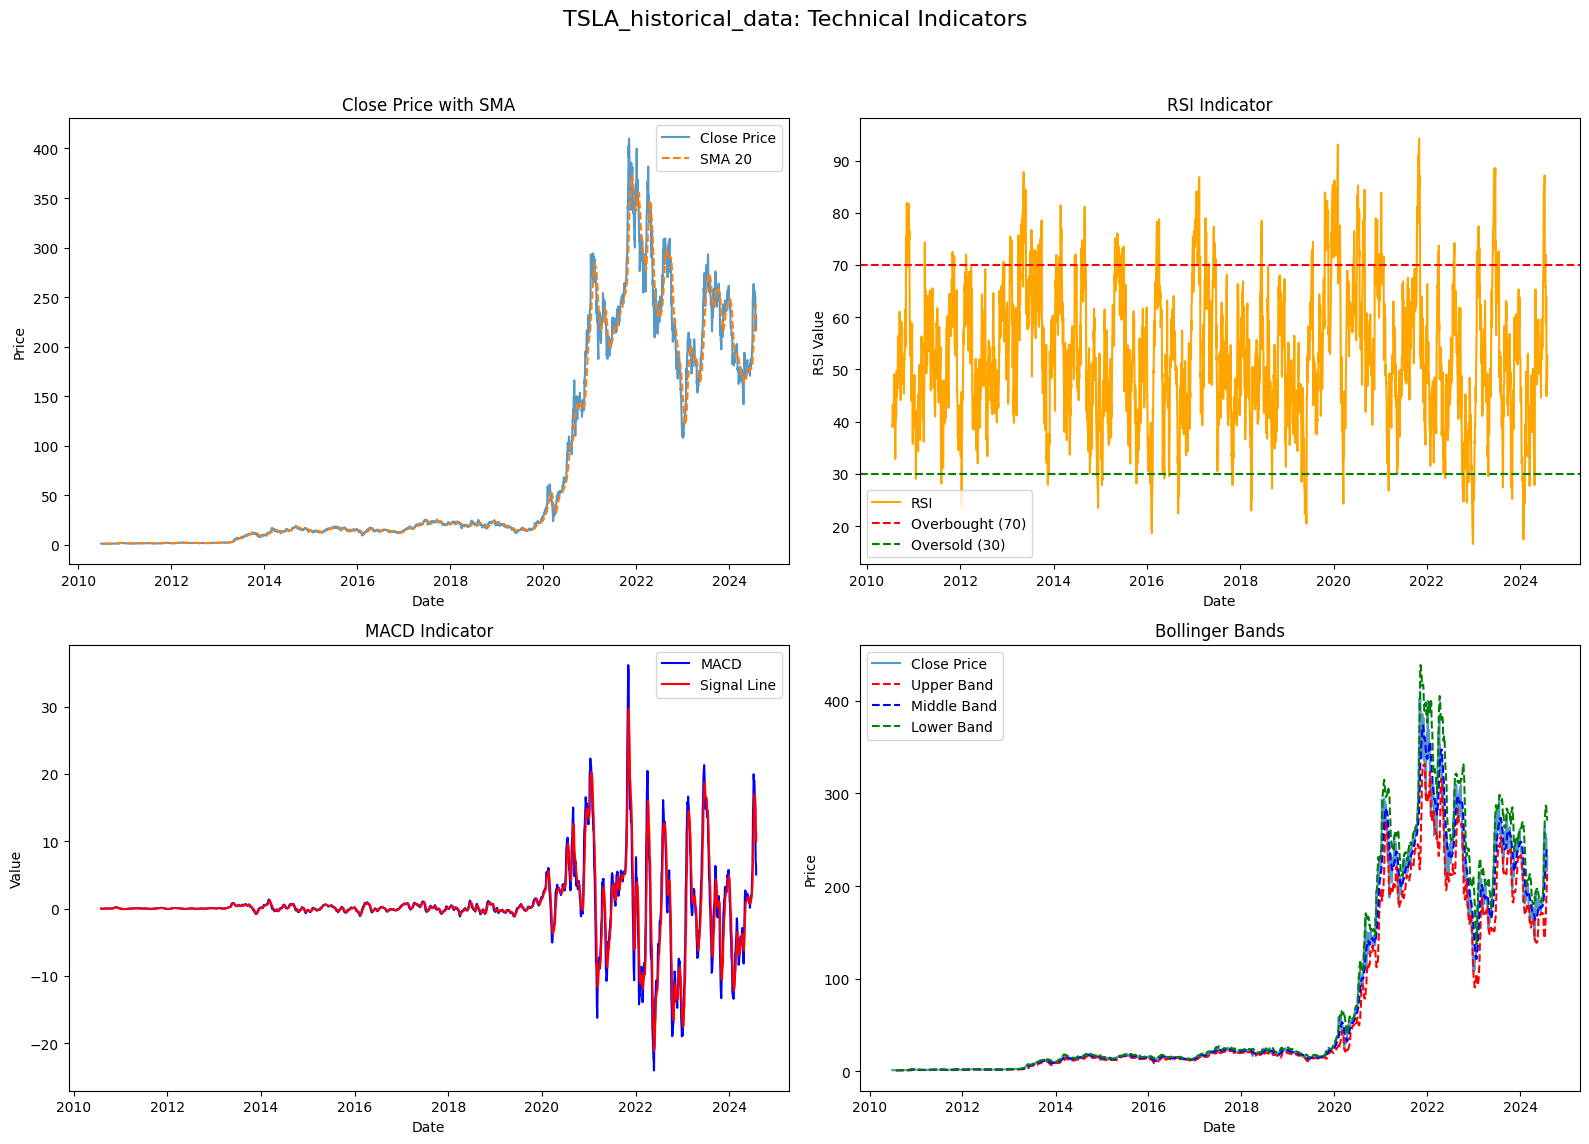

Financial metrics for TSLA_historical_data:
              Open         High          Low        Close    Adj Close  \
count  3545.000000  3545.000000  3545.000000  3545.000000  3545.000000   
mean     75.505658    77.159237    73.743492    75.487264    75.487264   
std     102.530489   104.806516   100.051787   102.456615   102.456615   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.516667    11.861333    11.216667    11.565333    11.565333   
50%      17.463333    17.688667    17.100000    17.459333    17.459333   
75%     161.880005   165.333328   158.360001   161.479996   161.479996   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  Dividends  Stock Splits       SMA_20          RSI  \
count  3.545000e+03     3545.0   3545.000000  3526.000000  3531.000000   
mean   9.699708e+07        0.0      0.002257    75.250781    52.886059   
std    7.866828e+07        0.0      0.097921   101.918842    13.032

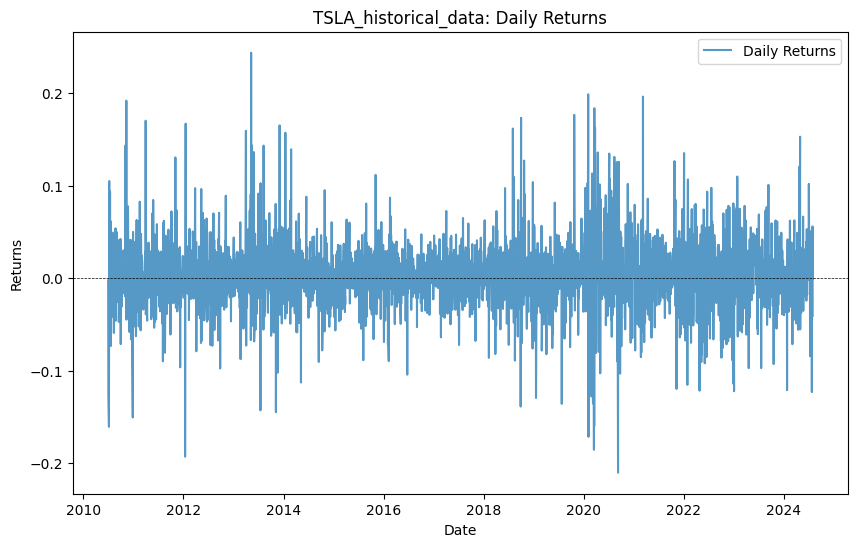

Processed data saved for TSLA_historical_data to ../../data/processed_TSLA_historical_data.csv


In [19]:
combined_data = pd.read_csv('../../data/combined_stock_data.csv')  # Use the correct path
# print(combined_data.head())
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

for stock_name, stock_data in combined_data.groupby('Stock'):
    print(f"Processing stock: {stock_name}")

    # Drop rows with insufficient data for indicators
    if len(stock_data) < 26:  # Ensure enough data for MACD's long period
        print(f"Not enough data to calculate indicators for {stock_name}")
        continue

    # Ensure the data is sorted by date
    stock_data = stock_data.sort_index()

    # Convert Close prices to numpy array for tulipy
    close_prices = stock_data['Close'].values

    # Calculate Technical Indicators
    stock_data['SMA_20'] = pd.Series(ti.sma(close_prices, period=20), index=stock_data.index[-len(ti.sma(close_prices, period=20)):])
    stock_data['RSI'] = pd.Series(ti.rsi(close_prices, period=14), index=stock_data.index[-len(ti.rsi(close_prices, period=14)):])
    macd_data = ti.macd(close_prices, short_period=12, long_period=26, signal_period=9)
    stock_data['MACD'] = pd.Series(macd_data[0], index=stock_data.index[-len(macd_data[0]):])
    stock_data['MACD_signal'] = pd.Series(macd_data[1], index=stock_data.index[-len(macd_data[1]):])
    upper_band, middle_band, lower_band = ti.bbands(close_prices, period=20, stddev=2)
    stock_data['upper_band'] = pd.Series(upper_band, index=stock_data.index[-len(upper_band):])
    stock_data['middle_band'] = pd.Series(middle_band, index=stock_data.index[-len(middle_band):])
    stock_data['lower_band'] = pd.Series(lower_band, index=stock_data.index[-len(lower_band):])

    # Visualization in Grid
    visualize_indicators_in_grid(stock_data, stock_name)

    # Financial Metrics
    calculate_financial_metrics_with_pynance(stock_data, stock_name)
    # calculate_financial_metrics_with_pynance

    # Save Processed Data
    output_file = f'../../data/processed_{stock_name}.csv'
    stock_data.to_csv(output_file)
    print(f"Processed data saved for {stock_name} to {output_file}")
